<a href="https://colab.research.google.com/github/Anshad-Aziz/Machine_Learning/blob/main/Diabetes_Factors_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('diabetes-vid.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df['Outcome'].value_counts()

alive    500
dead     268
Name: Outcome, dtype: int64

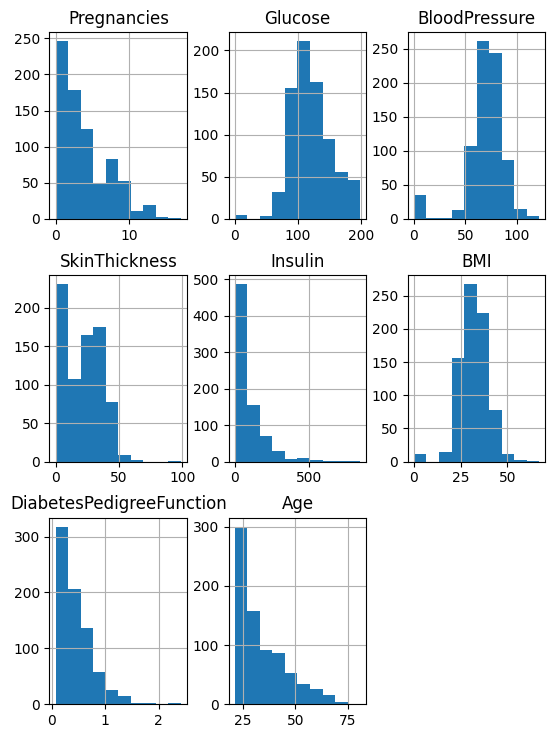

In [8]:
df.hist()
plt.subplots_adjust(bottom=0.1,top=1.5)

<ipython-input-9-b350443d6043>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues')


<Axes: >

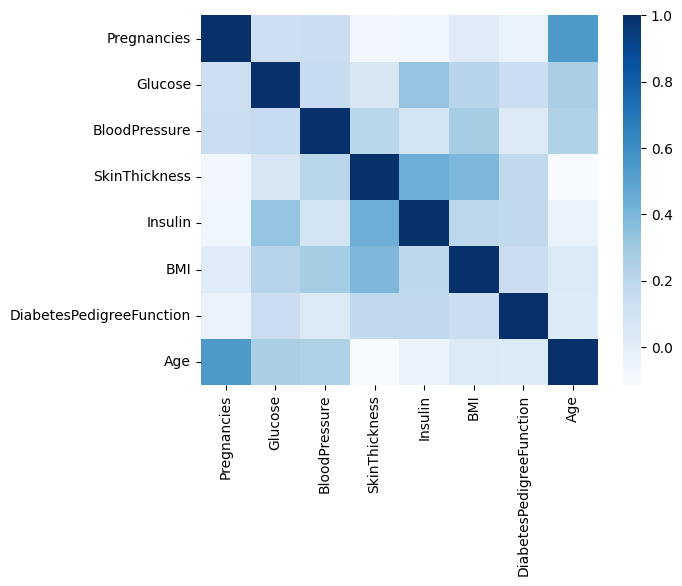

In [9]:
sns.heatmap(df.corr(),cmap='Blues')

In [10]:
df[df['Outcome']=='dead'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000


In [11]:
df[df['Outcome']=='alive'].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000


In [12]:
df['Age_bins']=pd.cut(df['Age'],bins=[20,35,50,65,80,95],labels=['20-35','35-50','50-65','65-80','80-95'])

In [13]:
pd.DataFrame(df[['Age_bins','Outcome']].groupby('Age_bins').value_counts(),columns=['Count'])

Count
Age_bins Outcome       
20-35    alive      367
         dead       131
35-50    dead        99
         alive       90
50-65    alive       34
         dead        34
65-80    alive        8
         dead         4
80-95    alive        1
         dead         0

In [14]:
final_df=pd.merge(df,pd.get_dummies(df['Age_bins']),left_index=True,right_index=True).drop(['Age_bins','Age'],axis=1)
final_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,20-35,35-50,50-65,65-80,80-95
0,6,148,72,35,0,33.6,0.627,dead,0,1,0,0,0
1,1,85,66,29,0,26.6,0.351,alive,1,0,0,0,0
2,8,183,64,0,0,23.3,0.672,dead,1,0,0,0,0
3,1,89,66,23,94,28.1,0.167,alive,1,0,0,0,0
4,0,137,40,35,168,43.1,2.288,dead,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,alive,0,0,1,0,0
764,2,122,70,27,0,36.8,0.340,alive,1,0,0,0,0
765,5,121,72,23,112,26.2,0.245,alive,1,0,0,0,0
766,1,126,60,0,0,30.1,0.349,dead,0,1,0,0,0


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
train_df=final_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','20-35','35-50','50-65','65-80','80-95','Outcome']]

In [17]:
X=train_df[['Glucose','BMI','SkinThickness','BloodPressure','20-35','35-50','50-65','65-80','80-95']]
y=train_df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.2)

In [18]:
clf=AdaBoostClassifier(n_estimators=150)
clf.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=150)

In [20]:
scores=cross_val_score(clf,X_train,y_train,cv=5)
print('Mean Score:{}'.format(scores.mean()))

Mean Score:0.6970411835265893


In [21]:
y_pred=clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.8051948051948052